In [87]:
import pandas as pd
import numpy as np
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
matplotlib.rc('font', size=16)
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 

In [3]:
#Loading the files of 2006:
file06 = pd.read_csv('ProtonDec06.csv', skiprows=454)
p1 = file06['p1_flux'].values # Proton channel 0.6   - 4.0   MeV
p2 = file06['p2_flux'].values # Proton channel 4.0   - 9.0   MeV
p3 = file06['p3_flux'].values # Proton channel 9.0   - 15.0  MeV
p4 = file06['p4_flux'].values # Proton channel 15.0  - 40.0  MeV
p5 = file06['p5_flux'].values # Proton channel 40.0  - 80.0  MeV
p6 = file06['p6_flux'].values # Proton channel 80.0  - 165.0 MeV
p7 = file06['p7_flux'].values # Proton channel 165.0 - 500.0 MeV

In [4]:
#Loading the files of 2017:
file17 = pd.read_csv('ProtonsSept17.csv', skiprows=717)
p1E = file17['ZPGT1E'].values 
p1W = file17['ZPGT1W'].values
#Flux of >1 MeV protons from the B detector that faces either East or West depending 
#on the yaw flip of the satellite with a correction applied to remove contaminating particles

p2E = file17['ZPGT5E'].values  #Flux of >5 MeV protons from the B detector, East
p2W = file17['ZPGT5W'].values  #Flux of >5 MeV protons from the B detector , West

p3E = file17['ZPGT10E'].values #Flux of >10 MeV protons from the B detector, East 
p3W = file17['ZPGT10W'].values #Flux of >10 MeV protons from the B detector, West 

p4E = file17['ZPGT30E'].values #Flux of >30 MeV protons from the B detector, East
p4W = file17['ZPGT30W'].values #Flux of >30 MeV protons from the B detector, West 

p5E = file17['ZPGT50E'].values #Flux of >50 MeV protons from the B detector, East
p5W = file17['ZPGT50W'].values #Flux of >50 MeV protons from the B detector, West 

p6E = file17['ZPGT60E'].values #Flux of >60 MeV protons from the B detector, East 
p6W = file17['ZPGT60W'].values #Flux of >60 MeV protons from the B detector, West 

p7E = file17['ZPGT100E'].values #Flux of >100 MeV protons from the B detector, East 
p7W = file17['ZPGT100W'].values #Flux of >100 MeV protons from the B detector, West 

In [5]:
Avgp1 = (p1E+p1W)/2
Avgp2 = (p2E+p2W)/2
Avgp3 = (p3E+p3W)/2
Avgp4 = (p4E+p4W)/2
Avgp5 = (p5E+p5W)/2
Avgp6 = (p6E+p6W)/2
Avgp7 = (p7E+p7W)/2

In [6]:
#Changing the time strings to datetime objects
time06 = pd.read_csv('ProtonDec06.csv', skiprows=454)['time_tag']
time17 = pd.read_csv('ProtonsSept17.csv', skiprows=717)['time_tag']
larray2 = len(time06)
larray = len(time17)
Time = []
Time06 = []
for i in range(0,larray2):
    temp2 = datetime.strptime(time06.values[i],'%Y-%m-%d %H:%M:%S.%f')
    Time06.append(temp2)
    
for i in range(0,larray):
    temp = datetime.strptime(time17.values[i], '%Y-%m-%d %H:%M:%S.%f')
    Time.append(temp)

In [7]:
#This part is to style our plots. It will create the x-ticks. 
labelx = [1,2304,4320,6336,8640]
labels = ['Day 1', 'Day 8', 'Day 15', 'Day 22', 'Day 30']

In [49]:
r = []
for i in range(len(Avgp7)):
    ratio = Avgp7[i]/p7[i]
    r.append(ratio)
rmax = max(r)
rnorm = r/rmax

# Now we have prepared all the data, let's create some plots

Text(0,0.5,'Proton flux (p/cm$^2$ s sr)')

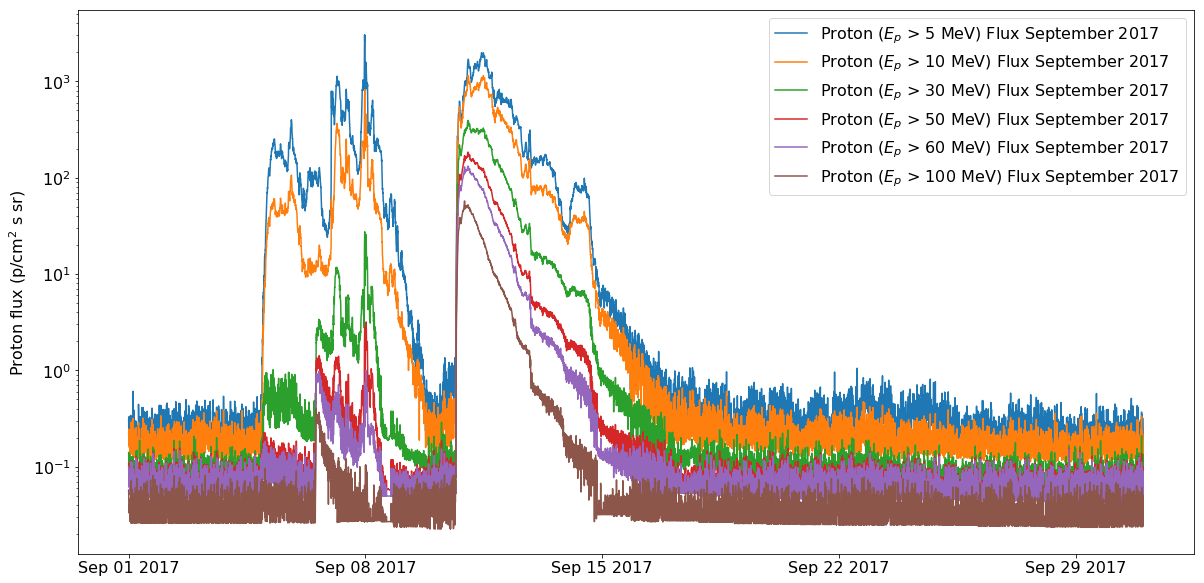

In [92]:
#All the proton energies plotted
fig = plt.figure()
fig.set_size_inches(20,10)
ax = plt.gca()
#p12017 = plt.semilogy(Time,Avgp1,color='r',label="Proton (E > 1 MeV) Flux September 2017")
p22017 = plt.semilogy(Time,Avgp2,label="Proton ($E_p$ > 5 MeV) Flux September 2017")
p32017 = plt.semilogy(Time,Avgp3,label="Proton ($E_p$ > 10 MeV) Flux September 2017")
p42017 = plt.semilogy(Time,Avgp4,label="Proton ($E_p$ > 30 MeV) Flux September 2017")
p52017 = plt.semilogy(Time,Avgp5,label="Proton ($E_p$ > 50 MeV) Flux September 2017")
p62017 = plt.semilogy(Time,Avgp6,label="Proton ($E_p$ > 60 MeV) Flux September 2017")
p72017 = plt.semilogy(Time,Avgp7,label="Proton ($E_p$ > 100 MeV) Flux September 2017")
plt.legend(handles=[p22017[0],p32017[0],p42017[0],p52017[0],p62017[0],p72017[0]])
ax.set_ylabel('Proton flux (p/cm$^2$ s sr)')

# This will be the 2006 December plot

Text(0,0.5,'Proton flux (p/cm$^2$ s sr)')

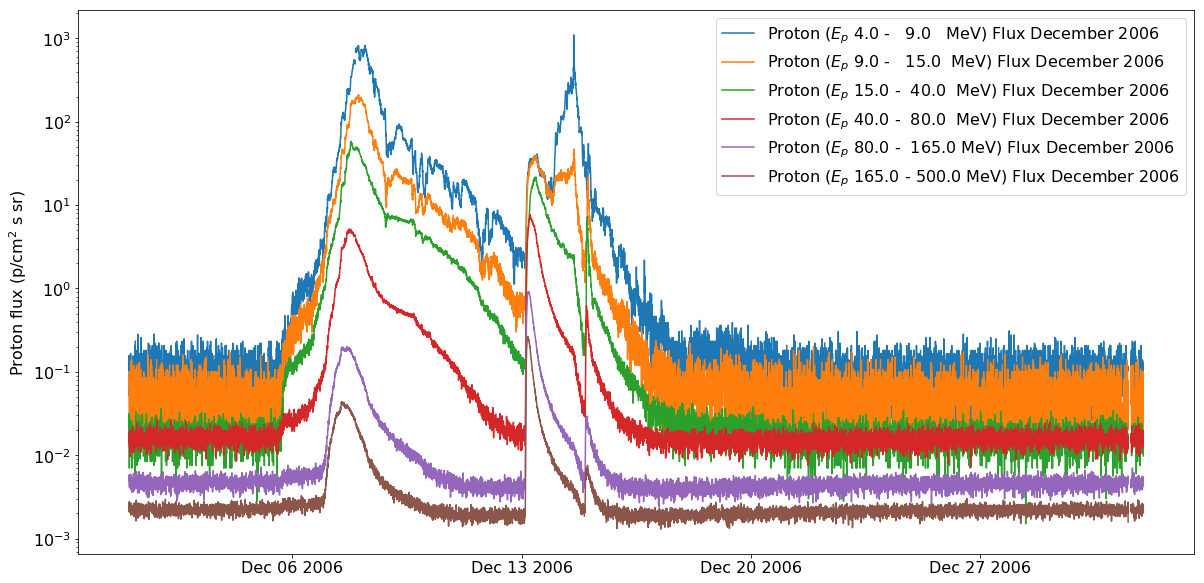

In [73]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax = plt.gca()
#p12006 = plt.semilogy(Time06,p1,color='r',label="Proton ($E_p$ .6 - 4.0 MeV) Flux December 2006")
p22006 = plt.semilogy(Time06,p2,label="Proton ($E_p$ 4.0 -   9.0   MeV) Flux December 2006")
p32006 = plt.semilogy(Time06,p3,label="Proton ($E_p$ 9.0 -   15.0  MeV) Flux December 2006")
p42006 = plt.semilogy(Time06,p4,label="Proton ($E_p$ 15.0 -  40.0  MeV) Flux December 2006")
p52006 = plt.semilogy(Time06,p5,label="Proton ($E_p$ 40.0 -  80.0  MeV) Flux December 2006")
p62006 = plt.semilogy(Time06,p6,label="Proton ($E_p$ 80.0 -  165.0 MeV) Flux December 2006")
p72006 = plt.semilogy(Time06,p7,label="Proton ($E_p$ 165.0 - 500.0 MeV) Flux December 2006")
plt.legend(handles=[p22006[0],p32006[0],p42006[0],p52006[0],p62006[0],p72006[0]])
ax.set_ylabel('Proton flux (p/cm$^2$ s sr)')

# Comparison

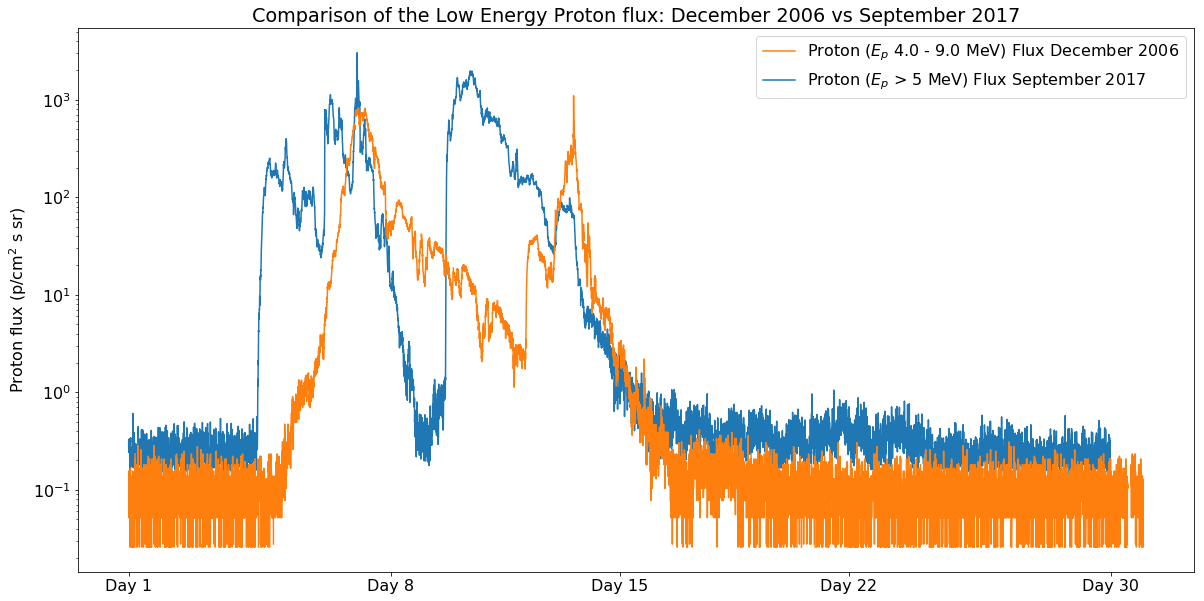

In [74]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax = plt.gca()
p22017 = plt.semilogy(Avgp2,label="Proton ($E_p$ > 5 MeV) Flux September 2017")
p22006 = plt.semilogy(p2,label="Proton ($E_p$ 4.0 - 9.0 MeV) Flux December 2006")
ax.set_title('Comparison of the Low Energy Proton flux: December 2006 vs September 2017')
ax.set_ylabel('Proton flux (p/cm$^2$ s sr)')
plt.xticks(labelx,labels)
plt.legend(handles=[p22006[0],p22017[0]])

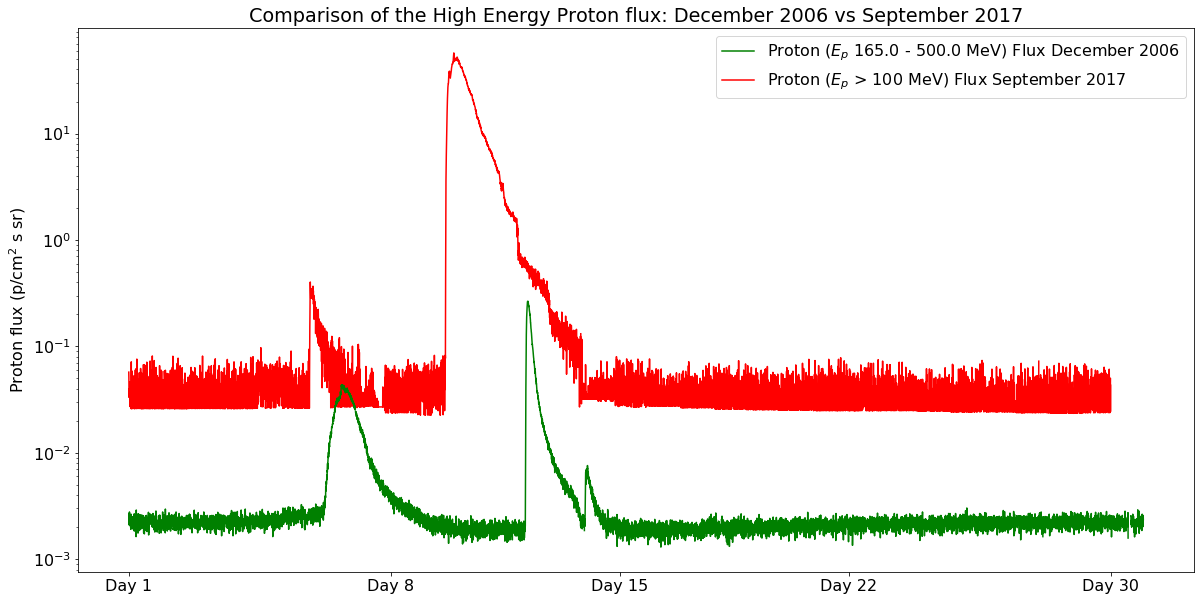

In [75]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax = plt.gca()
p72017 = plt.semilogy(Avgp7,color='r',label="Proton ($E_p$ > 100 MeV) Flux September 2017")
p72006 = plt.semilogy(p7,color='g',label="Proton ($E_p$ 165.0 - 500.0 MeV) Flux December 2006")
ax.set_title('Comparison of the High Energy Proton flux: December 2006 vs September 2017')
ax.set_ylabel('Proton flux (p/cm$^2$ s sr)')
plt.xticks(labelx,labels)
plt.legend(handles=[p72006[0],p72017[0]])

The ratio of the Proton flux peak (E ~ 5 MeV) (flux 2017)/(flux(2006) is: 2.75063636364
The ratio of the Proton flux peak (E ~ 10 MeV) (flux 2017)/(flux(2006) is: 5.44312796209
The ratio of the Proton flux peak (E ~ 30 MeV) (flux 2017)/(flux(2006) is: 6.79159445407
The ratio of the Proton flux peak (E ~ 50 MeV) (flux 2017)/(flux(2006) is: 24.0628272251
The ratio of the Proton flux peak (E ~ 60 MeV) (flux 2017)/(flux(2006) is: 144.501096491
The ratio of the Proton flux peak (E ~ 100 MeV) (flux 2017)/(flux(2006) is: 215.293233083


Text(0.5,1,'Ratio of Proton flux peak vs. Energy, Sept 2017 vs December 2006')

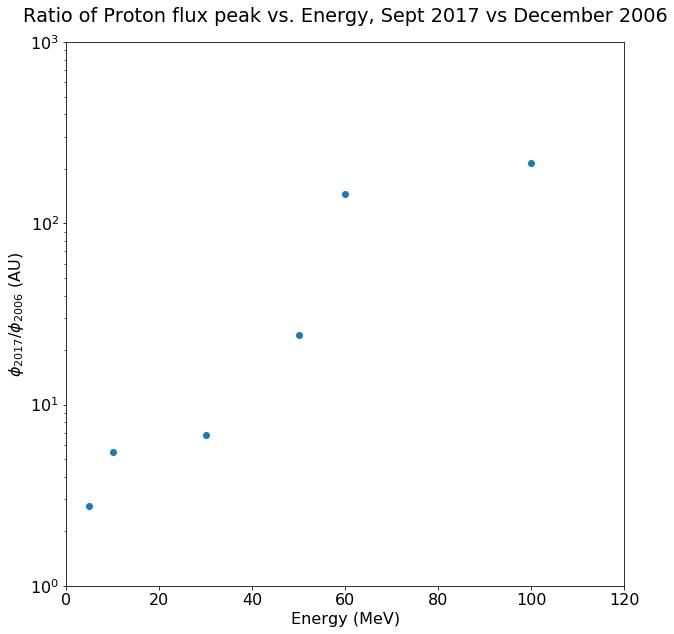

In [91]:
ratio2 = max(Avgp2)/max(p2)
ratio3 = max(Avgp3)/max(p3)
ratio4 = max(Avgp4)/max(p4)
ratio5 = max(Avgp5)/max(p5)
ratio6 = max(Avgp6)/max(p6)
ratio7 = max(Avgp7)/max(p7)
xr = [5, 10, 30, 50, 60, 100]
r = [ratio2, ratio3, ratio4, ratio5, ratio6, ratio7]
print('The ratio of the Proton flux peak (E ~ 5 MeV) (flux 2017)/(flux(2006) is: ' + str(ratio2))
print('The ratio of the Proton flux peak (E ~ 10 MeV) (flux 2017)/(flux(2006) is: ' + str(ratio3))
print('The ratio of the Proton flux peak (E ~ 30 MeV) (flux 2017)/(flux(2006) is: ' + str(ratio4))
print('The ratio of the Proton flux peak (E ~ 50 MeV) (flux 2017)/(flux(2006) is: ' + str(ratio5))
print('The ratio of the Proton flux peak (E ~ 60 MeV) (flux 2017)/(flux(2006) is: ' + str(ratio6))
print('The ratio of the Proton flux peak (E ~ 100 MeV) (flux 2017)/(flux(2006) is: ' + str(ratio7))
fig = plt.figure()
fig.set_size_inches(10,10)
ax = plt.gca()
ratplot = plt.scatter(xr,r)
ax.set_ylim([1,1000])
ax.set_xlim([0,120])
ax.set_yscale('log')
ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('$\phi_{2017}/\phi_{2006}$ (AU)')
ax.set_title('Ratio of Proton flux peak vs. Energy, Sept 2017 vs December 2006')

In [ ]:
fig = plt.figure()
fig.set_size_inches(10,10)
ax = plt.gca()
he2017 = plt.semilogy(Time,FluxHE17avg,color='r',label="Proton flux > 100 MeV September 2017")
ax.set_title('High Energetic (>100 MeV) Proton flux in September 2017')
ax.set_ylabel('Proton flux (p/cm$^2$ s sr)')
plt.legend(handles=[he2017[0]])

In [ ]:
fig = plt.figure()
fig.set_size_inches(10,10)
ax = plt.gca()
he2006 = plt.semilogy(Time06,FluxHE06,label="Proton Flux 165-500 MeV December 2006")
ax.set_title('High Energetic (165-500 MeV) Proton flux in December 2006')
ax.set_ylabel('Proton flux (p/cm$^2$ s sr)')
plt.legend(handles=[he2006[0]])

In [ ]:
fig = plt.figure()
fig.set_size_inches(10,10)
ax = plt.gca()
he2017 = plt.semilogy(FluxHE17avg,color='r',label="Proton flux > 100 MeV 09/2017")
he2006 = plt.semilogy(FluxHE06,label="Proton Flux 165-500 MeV 12/2006")
le2006 = plt.semilogy(Flux2HE06,color='g',label="Proton Flux 80-165 MeV 12/2006")
ax.set_xticks([])
ax.set_title('High Energy Proton Flux - December 2006 versus September 2017')
ax.set_ylabel('Proton flux (p/cm$^2$ s sr)')
ax.set_xlabel('Time (AU)')
plt.legend(handles=[le2006[0],he2006[0],he2017[0]])

# We see that the BG HE Proton flux is higher for the event in 2017.

In [ ]:
#Extra code, ignore
fig = plt.figure()
fig.set_size_inches(10,10)
ax = plt.gca()
he2017 = plt.semilogy(FluxHE17avg,color='r',label="Proton flux > 100 MeV September 2017")
he2006 = plt.semilogy(FluxHE06+Flux2HE06,label="Proton Flux 165-500 MeV December 2006") #Sum of 80 + 165 MeV
#le2006 = plt.semilogy(Flux2HE06,color='g',label="Proton Flux 80-165 MeV 12/2006")
ax.set_ylabel('p/(cm^2 s sr MeV')
plt.legend(handles=[he2006[0],he2017[0]])#handles=[he2017,he2006,le2006])
#ax.xaxis.set_minor_locator(plt.FixedLocator([2,3,4,5]))

In [ ]:
flux = pd.read_csv('Xraysept6.csv', skiprows=139)['A_FLUX'].values
time = pd.read_csv('Xraysept6.csv', skiprows=139)['time_tag'].values
ax = plt.gca()
plt.semilogy(time,flux)
ax.set_xticks([1,20000,40000])